# **Importation des données pour le projet**

Importation des bibliothèques 

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
import requests
from io import BytesIO
!pip install openpyxl

Chargement des fichiers contenant les données

In [ ]:
chomage = pd.read_excel('Chômage_depuis1975.xlsx')
confiance = pd.read_excel('Confiance_ménages.xlsx')
ev_pib = pd.read_excel('Evolution_PIB_trimestre.xlsx')
ipc = pd.read_excel('ipc_menages.xlsx')

/opt/conda/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [8]:
def url_to_dataframe(url):
    try:
        # On récupère un fichier excel à partir d'une URL
        response = requests.get(url)
        response.raise_for_status()  # Vérifie si la requête a réussi
        
        # On ouvre le fichier depuis la réponse
        xlsx_data = BytesIO(response.content)
        
        # On lit ce fichier avec pd
        df = pd.read_excel(xlsx_data, engine='openpyxl')
        
        print("Fichier téléchargé et chargé dans un df.")
        return df
    
    except Exception as e:
        print(f"Erreur {e}")
        return None

In [9]:
url = "https://www.insee.fr/fr/statistiques/fichier/4805248/Essentiel_chomage_donnees.xlsx"  
dataframe = url_to_dataframe(url)

Fichier téléchargé et chargé dans un df.


In [10]:
print(dataframe)

                         L'essentiel sur … le chômage
0                                                 NaN
1                                En quelques chiffres
2                                                 NaN
3           Figure 1 - Taux de chômage au sens du BIT
4                                                 NaN
5          Figure 2 - Taux de chômage par âge en 2023
6                                                 NaN
7                 Figure 3 - Taux de chômage par sexe
8                                                 NaN
9   Figure 4 - Taux de chômage par niveau de diplô...
10                                                NaN
11                      Figure 5 - Nombre de chômeurs
12                                                NaN
13                         Figure 6 - Taux de chômage
14                                                NaN
15  Figure 7 - Répartition des chômeurs selon l'an...
16                                                NaN
17                          

### Nettoyage des données relatives au chômage

In [ ]:
chomage.head()

,Tableau 1. Taux de chômage trimestriel au sens du BIT en France (hors Mayotte) par sexe et âge,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,"Données CVS en moyenne trimestrielle, en %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,En jaune : Les séries ont été constituées à pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,HOMMES (%),NaN,NaN,NaN,FEMMES (%),NaN,NaN,NaN,TOTAL (%),NaN,NaN,NaN,Nombre de chômeurs
4,trimestre.année,Âge,NaN,NaN,Total,Âge,NaN,NaN,Total,Âge,NaN,NaN,Total,NaN


In [ ]:
# On renomme les colonnes à utiliser
chomage.rename(columns={'Unnamed: 12': 'taux_chomage'}, inplace=True)
chomage.rename(columns={'Tableau 1. Taux de chômage trimestriel au sens du BIT en France (hors Mayotte) par sexe et âge': 'trimestre'}, inplace=True) 

In [ ]:
print(chomage.columns)

Index(['trimestre', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'taux_chomage', 'Unnamed: 13'],
      dtype='object')


In [ ]:
# On supprime les colonnes inutiles
chomage.drop(columns=[ 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 
    'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 
    'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 13'], inplace=True)

chomage

,trimestre,taux_chomage
0,"Données CVS en moyenne trimestrielle, en %",NaN
1,NaN,NaN
2,En jaune : Les séries ont été constituées à pa...,NaN
3,NaN,NaN
4,trimestre.année,Total
...,...,...
203,T2.2024,7.3
204,T3.2024,7.4
205,NaN,NaN
206,"Champ : France hors Mayotte, personnes vivant ...",NaN


In [ ]:
# Trouver l'index de la valeur 'T1.2000' dans la colonne 'trimestre'
index_t1_2000 = chomage[chomage['trimestre'] == 'T1.2000'].index

# Afficher l'index
print(index_t1_2000)

Index([106], dtype='int64')


In [ ]:
# On supprime les premières lignes inutiles pour que les données débutent au premier trimestre  
chomage = chomage.iloc[106:].reset_index(drop=True)

# Afficher les premieres lignes des données nettoyées
chomage.head()

,trimestre,taux_chomage
0,T1.2000,9.1
1,T2.2000,8.7
2,T3.2000,8.4
3,T4.2000,8
4,T1.2001,7.8


In [10]:
print(chomage.trimestre)

0                                                T1.2000
1                                                T2.2000
2                                                T3.2000
3                                                T4.2000
4                                                T1.2001
                             ...                        
97                                               T2.2024
98                                               T3.2024
99                                                   NaN
100    Champ : France hors Mayotte, personnes vivant ...
101                       Source : Insee, enquête Emploi
Name: trimestre, Length: 102, dtype: object


In [11]:
#Déterminuer où sont situés les NaN s'il y en a
print(chomage[chomage.isna().any(axis=1)])

                                             trimestre taux_chomage
99                                                 NaN          NaN
100  Champ : France hors Mayotte, personnes vivant ...          NaN
101                     Source : Insee, enquête Emploi          NaN


In [12]:
# Supprimer les lignes contenant des NaN car elles ne comportent pas de données
chomage = chomage.dropna()

# Vérifier le résultat
print(chomage.isna().sum())  

trimestre       0
taux_chomage    0
dtype: int64


### Nettoyage des données relatives à la confiance

In [13]:
confiance.head()

,Opinion des ménages-Monthly confidence consumer survey,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Données corrigées des variations saisonnières-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DATE,Indicateur synthétique,Niveau de vie en France - évolution passée,Niveau de vie en France - perspectives d'évolu...,Chômage - perspectives d'évolution,Prix - évolution passée,Prix - perspectives d'évolution,Opportunité de faire des achats importants,Opportunité d'épargner,Capacité d'épargne actuelle,Situation financière personnelle - évolution p...,Situation financière personnelle - perspective...,Capacité d'épargne future
3,NaN,Synthetic index,"General economic situation, past 12 months","General economic situation, next 12 months","Unemployment, next 12 months","Consumer prices, past 12 months","Consumer prices, next 12 months","Major purchases intentions, next 12 months","Savings intentions, next 12 months",Current saving capacity,"Financial situation, past 12 months","Financial situation, next 12 months",Expected saving capacity
4,moyenne/average,100,-47.749835,-27.733798,32.585969,-13.383858,-31.095762,-15.188091,18.029779,9.656539,-20.980754,-6.560103,-7.110802


In [14]:
# Renommer les colonnes à utiliser
confiance.rename(columns={'Unnamed: 1': 'indic_confiance'}, inplace=True)
confiance.rename(columns={'Opinion des ménages-Monthly confidence consumer survey': 'date'}, inplace=True) 

In [15]:
print(confiance.columns)

Index(['date', 'indic_confiance', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


In [16]:
# Supprimer les colonnes inutiles pour notre analyse
confiance.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], inplace=True)

In [17]:
# S'assurer que la colonne 'date' est au format datetime
confiance['date'] = pd.to_datetime(confiance['date'], errors='coerce')

# Filtrer les données à partir de janvier 2000
confiance =confiance[confiance['date'] >= '2000-01-01']

# Afficher les premières lignes des données filtrées
confiance.head()

/tmp/ipykernel_47595/3570054967.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confiance['date'] = pd.to_datetime(confiance['date'], errors='coerce')


,date,indic_confiance
204,2000-01-01,119.186742
205,2000-02-01,119.010085
206,2000-03-01,119.930046
207,2000-04-01,122.586881
208,2000-05-01,122.625812


In [18]:
# Convertir les données journalières en trimestrielles (moyenne trimestrielle)
confiance["date"] = pd.to_datetime(confiance["date"])
confiance.set_index("date", inplace=True)
confiance = confiance.resample("QE").mean()

#Réinitialisation de la colonne date et changement de nom
confiance = confiance.reset_index()
confiance.rename(columns={'date': 'trimestre'}, inplace=True) 

#Vérification
confiance.head()

,trimestre,indic_confiance
0,2000-03-31,119.375624
1,2000-06-30,122.715558
2,2000-09-30,121.334655
3,2000-12-31,121.035423
4,2001-03-31,124.096635


In [19]:
print(confiance.trimestre)

0    2000-03-31
1    2000-06-30
2    2000-09-30
3    2000-12-31
4    2001-03-31
        ...    
95   2023-12-31
96   2024-03-31
97   2024-06-30
98   2024-09-30
99   2024-12-31
Name: trimestre, Length: 100, dtype: datetime64[ns]


In [20]:
#Transformation de l'écriture des éléments de la colonne trimestre pour que toutes les colonnes soient du même format
# On sait que la colonne des dates est bien en format datetime

def format_trimestre(trimestre):
    # Extraire l'année et le trimestre
    annee = trimestre.year
    mois = trimestre.month
    # Calculer le trimestre en fonction du mois
    if mois in [3]:
        trimestre = "T1"
    elif mois in [6]:
        trimestre = "T2"
    elif mois in [9]:
        trimestre = "T3"
    else:
        trimestre = "T4"
    # Retourner le format "T1.2000"
    return f"{trimestre}.{annee}"

# Appliquer la fonction à chaque date pour créer la nouvelle colonne
confiance['trimestre'] = confiance['trimestre'].apply(format_trimestre)

confiance.head()


,trimestre,indic_confiance
0,T1.2000,119.375624
1,T2.2000,122.715558
2,T3.2000,121.334655
3,T4.2000,121.035423
4,T1.2001,124.096635


In [21]:
#Déterminuer où sont situés les NaN s'il y en a
print(confiance[confiance.isna().any(axis=1)])

Empty DataFrame
Columns: [trimestre, indic_confiance]
Index: []


### Nettoyage des données relatives au PIB

On cherche à isoler des indicateurs pour l'évolution du PIB, la consommation des ménages et des APU, la formation brute de capital fixe, les importations et exportations. On fait le choix de prendre plus d'indicateurs, quitte à les éliminer par la suite.

In [22]:
ev_pib.head()

,Évolution du produit intérieur brut et de ses composantes,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,par rapport au trimestre précédent en volume en %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trimestre,Produit intérieur brut (PIB),Importations,Dépense de consommation des ménages,Dépense de consommation des APU1,Formation brute de capital fixe,dont :,NaN,NaN,Exportations,Contributions :,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Entreprises non financières,ménages,APU1,NaN,Demande intérieure finale hors stocks,Variations de stocks,Commerce extérieur
4,2024-T3,0.362294,-0.684306,0.515766,0.513113,-0.84265,-1.365417,-0.887841,0.472325,-0.470732,0.212544,0.069318,0.080432


In [23]:
# Renommer les colonnes à utiliser
ev_pib.rename(columns={'Évolution du produit intérieur brut et de ses composantes': 'trimestre'}, inplace=True)
ev_pib.rename(columns={'Unnamed: 1': 'ev_pib'}, inplace=True) 
ev_pib.rename(columns={'Unnamed: 2': 'ev_importations'}, inplace=True) 
ev_pib.rename(columns={'Unnamed: 3': 'ev_conso_menages'}, inplace=True) 
ev_pib.rename(columns={'Unnamed: 4': 'ev_conso_apu'}, inplace=True) 
ev_pib.rename(columns={'Unnamed: 5': 'ev_fbcf'}, inplace=True) 
ev_pib.rename(columns={'Unnamed: 9': 'ev_exportations'}, inplace=True) 

In [24]:
print(ev_pib.columns)

Index(['trimestre', 'ev_pib', 'ev_importations', 'ev_conso_menages',
       'ev_conso_apu', 'ev_fbcf', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'ev_exportations', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


In [25]:
# Supprimer les colonnes
ev_pib.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
    'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], inplace=True)

#Inversion des colonnes pour avoir des données chronologiques
ev_pib = ev_pib.iloc[::-1].reset_index(drop=True)

# Vérification
ev_pib.head()

,trimestre,ev_pib,ev_importations,ev_conso_menages,ev_conso_apu,ev_fbcf,ev_exportations
0,"Source : Insee, comptes nationaux trimestriels...",NaN,NaN,NaN,NaN,NaN,NaN
1,Champ : France.,NaN,NaN,NaN,NaN,NaN,NaN
2,"Lecture : au 3e trimestre 2024, le produit int...",NaN,NaN,NaN,NaN,NaN,NaN
3,Note : données révisées ; les volumes sont mes...,NaN,NaN,NaN,NaN,NaN,NaN
4,1. Administrations publiques.,NaN,NaN,NaN,NaN,NaN,NaN


On remarque que les données sont ordonnées des plus récentes aux plus anciennes, on souhaite inverser cela pour faciliter le travail avec les autres tables. 

In [26]:
# Trouver l'index de la valeur '2000-T1' dans la colonne 'trimestre'
index_2000_t1 = ev_pib[ev_pib['trimestre'] == '2000-T1'].index

# Afficher l'index
print(index_2000_t1)


Index([209], dtype='int64')


In [27]:
# On supprime les premières lignes inutiles pour que les données débutent au premier trimestre de l'année 2000
ev_pib = ev_pib.iloc[209:].reset_index(drop=True)

On souhaite créer une nouvelle variable qui regroupe l'évolution de la consommation des ménages et des APU.

In [28]:
ev_pib['ev_conso'] = ev_pib['ev_conso_menages'] + ev_pib['ev_conso_apu']

# Afficher les premieres lignes des données 
ev_pib.head()

,trimestre,ev_pib,ev_importations,ev_conso_menages,ev_conso_apu,ev_fbcf,ev_exportations,ev_conso
0,2000-T1,1.011252,4.716928,1.256031,0.606497,2.244349,2.839274,1.862528
1,2000-T2,1.06425,4.20051,0.772804,0.464126,0.921508,4.963057,1.23693
2,2000-T3,0.780148,3.529602,0.444674,0.34475,2.53796,1.41363,0.789424
3,2000-T4,0.563163,2.2326,0.132284,0.155773,0.073162,2.984615,0.288057
4,2001-T1,0.57489,-1.295035,1.139891,0.125288,0.672418,0.408129,1.265179


In [29]:
print(ev_pib.trimestre)

0                                                2000-T1
1                                                2000-T2
2                                                2000-T3
3                                                2000-T4
4                                                2001-T1
                             ...                        
98                                               2024-T3
99                                                   NaN
100                                            Trimestre
101    par rapport au trimestre précédent en volume en %
102                                                  NaN
Name: trimestre, Length: 103, dtype: object


In [30]:
#Transformation de l'écriture des éléments de la colonne trimestre pour que toutes les colonnes soient du même format
# On vérifie que la colonne des trimestres est en chaîne de caractères
ev_pib['trimestre'] = ev_pib['trimestre'].astype(str)  

# Fonction pour convertir le format '2000-T1' en 'T1.2000'
def convertir_format(trimestre):
    try:
        # On vérifie si le format est correct (années-trimestre)
        annee, trimestre_num = trimestre.split('-')
        return f"{trimestre_num}.{annee}"  # On recompose le format 'T1.2000'
    except ValueError:
        # Pour les cas où le format n'est pas correct on ne change rien, c'est des valeurs inutiles qu'on supprimera ensuite.
        return trimestre  
   

# On applique la fonction à chaque valeur de la colonne
ev_pib['trimestre'] = ev_pib['trimestre'].apply(convertir_format)

#Verification
ev_pib.head()


,trimestre,ev_pib,ev_importations,ev_conso_menages,ev_conso_apu,ev_fbcf,ev_exportations,ev_conso
0,T1.2000,1.011252,4.716928,1.256031,0.606497,2.244349,2.839274,1.862528
1,T2.2000,1.06425,4.20051,0.772804,0.464126,0.921508,4.963057,1.23693
2,T3.2000,0.780148,3.529602,0.444674,0.34475,2.53796,1.41363,0.789424
3,T4.2000,0.563163,2.2326,0.132284,0.155773,0.073162,2.984615,0.288057
4,T1.2001,0.57489,-1.295035,1.139891,0.125288,0.672418,0.408129,1.265179


Vérification des NaN

In [31]:
print(ev_pib[ev_pib.isna().any(axis=1)])

                                             trimestre ev_pib ev_importations  \
99                                                 nan    NaN             NaN   
101  par rapport au trimestre précédent en volume en %    NaN             NaN   
102                                                nan    NaN             NaN   

    ev_conso_menages ev_conso_apu ev_fbcf ev_exportations ev_conso  
99               NaN          NaN     NaN             NaN      NaN  
101              NaN          NaN     NaN             NaN      NaN  
102              NaN          NaN     NaN             NaN      NaN  


In [32]:
#Suppression des lignes avec des NaN car elles ne nous intéressent pas
ev_pib = ev_pib.dropna()

#Vérification
print(ev_pib.isna().sum())

trimestre           0
ev_pib              0
ev_importations     0
ev_conso_menages    0
ev_conso_apu        0
ev_fbcf             0
ev_exportations     0
ev_conso            0
dtype: int64


Nettoyage des données sur l'indice des prix à la consommation

In [33]:
ipc.head()

,Libellé,Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble,Unnamed: 2
0,idBank,001759970,NaN
1,Dernière mise à jour,29/11/2024 08:45,NaN
2,Période,NaN,Date de parution au JO
3,2024-11,119.81,NaN
4,2024-10,119.89,17/11/2024


In [34]:
# Renommer les colonnes à utiliser
ipc.rename(columns={'Libellé': 'mois_année'}, inplace=True)
ipc.rename(columns={'Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble': 'ipc_menage'}, inplace=True) 

In [35]:
print(ipc.columns)

Index(['mois_année', 'ipc_menage', 'Unnamed: 2'], dtype='object')


In [36]:
# Supprimer les colonnes
ipc.drop(columns='Unnamed: 2', inplace=True)

# On supprime les premières lignes inutiles 
ipc = ipc.iloc[3:].reset_index(drop=True)

#Inversion des données pour les classer en ordre chronologique
ipc = ipc.iloc[::-1].reset_index(drop=True)

# Trouver l'index de la valeur '2000-01' dans la colonne 'mois_année'
index_2000_01 = ipc[ipc['mois_année'] == '2000-01'].index

# Afficher l'index
print(index_2000_01)

Index([120], dtype='int64')


In [37]:
# On supprime les premières lignes pour que les données débutent en janvier 2000
ipc = ipc.iloc[120:].reset_index(drop=True)

ipc.head()

,mois_année,ipc_menage
0,2000-01,79.17
1,2000-02,79.27
2,2000-03,79.64
3,2000-04,79.64
4,2000-05,79.8


In [38]:
#Vérification des NaN
print(ipc[ipc.isna().any(axis=1)])

Empty DataFrame
Columns: [mois_année, ipc_menage]
Index: []


In [39]:
#Passage de données mensuelles à trimestrielles
# Conversion de la colonne 'mois_année' en type datetime
ipc['mois_année'] = pd.to_datetime(ipc['mois_année'], format='%Y-%m')

# Définir la colonne 'mois_année' comme index
ipc.set_index('mois_année', inplace=True)

# Résumer les données par trimestre (somme dans cet exemple)
ipc = ipc.resample('QE').sum()

#Réinitialisation de la colonne mois_année et changement de nom
ipc = ipc.reset_index()
ipc.rename(columns={'mois_année': 'trimestre'}, inplace=True) 

#Vérification 
ipc.head()

,trimestre,ipc_menage
0,2000-03-31,238.08
1,2000-06-30,239.44
2,2000-09-30,240.32
3,2000-12-31,241.31
4,2001-03-31,241.19


In [40]:
#On utilise la fonction définie précedemmentpour modifier la colonne trimestre pour que toutes les colonnes soient du même format
ipc['trimestre'] = ipc['trimestre'].apply(format_trimestre)

#Verification
ipc.head()

,trimestre,ipc_menage
0,T1.2000,238.08
1,T2.2000,239.44
2,T3.2000,240.32
3,T4.2000,241.31
4,T1.2001,241.19


Téléchargement des données sur le CAC 40

In [41]:
pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.8-cp312-cp312-linux_x86_64.whl size=301618 sha256=82ae91ed5e24d6ac46cb647f17a0cf9407e0d5678497eb0bd4862ca26b3048f4
  Stored in directory: /home/onyxia/.cache/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [66]:
import yfinance as yf

# Téléchargement les données trimestrielles du CAC 40 avec l'API yfinance
CAC40_y = "^FCHI"  # Symbole Yahoo Finance pour le CAC 40
dfcac40 = yf.download(CAC40_y, start="2000-01-01", interval="3mo")

# Sauvegarder en CSV 
dfcac40.to_csv("cac40_trimestre.csv")


[*********************100%***********************]  1 of 1 completed


nettoyage des données du CAC40

In [43]:
cac40 = pd.read_csv("cac40_trimestre.csv")

In [44]:
cac40.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,^FCHI,^FCHI,^FCHI,^FCHI,^FCHI,^FCHI
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-12-01,6190.9599609375,6190.9599609375,6396.97021484375,5388.85009765625,6024.3798828125,0
3,2000-03-01,6426.259765625,6426.259765625,6591.43994140625,5752.43994140625,6272.1298828125,0
4,2000-06-01,6625.419921875,6625.419921875,6780.66015625,6354.93017578125,6428.4599609375,0


In [45]:
# Supprimer la colonne Volume
cac40.drop(columns='Volume', inplace=True)

#Supprimer les deux premières colonnes inutiles
cac40 = cac40.iloc[3:].reset_index(drop=True)

# Afficher les premières lignes du après suppression
cac40.head()

,Price,Adj Close,Close,High,Low,Open
0,2000-03-01,6426.259765625,6426.259765625,6591.43994140625,5752.43994140625,6272.1298828125
1,2000-06-01,6625.419921875,6625.419921875,6780.66015625,6354.93017578125,6428.4599609375
2,2000-09-01,5928.080078125,5928.080078125,6944.77001953125,5828.14013671875,6648.64013671875
3,2000-12-01,5367.47998046875,5367.47998046875,6126.41015625,5302.7900390625,5942.35986328125
4,2001-03-01,5454.18994140625,5454.18994140625,5728.52001953125,4804.39990234375,5334.22998046875


In [46]:
#Changement de nom de la colonne Price en date
cac40.rename(columns={'Price': 'trimestre'}, inplace=True)

In [47]:
#Vérification des NaN 
print(cac40[cac40.isna().any(axis=1)])

Empty DataFrame
Columns: [trimestre, Adj Close, Close, High, Low, Open]
Index: []


In [48]:
#On vérifie que les données de la colonne trimestre soient du format datetime
cac40['trimestre'] = pd.to_datetime(cac40['trimestre']) 

#On utilise la fonction définie précedemmentpour modifier la colonne trimestre pour que toutes les colonnes soient du même format
cac40['trimestre'] = cac40['trimestre'].apply(format_trimestre)

#Verification
cac40.head()

,trimestre,Adj Close,Close,High,Low,Open
0,T1.2000,6426.259765625,6426.259765625,6591.43994140625,5752.43994140625,6272.1298828125
1,T2.2000,6625.419921875,6625.419921875,6780.66015625,6354.93017578125,6428.4599609375
2,T3.2000,5928.080078125,5928.080078125,6944.77001953125,5828.14013671875,6648.64013671875
3,T4.2000,5367.47998046875,5367.47998046875,6126.41015625,5302.7900390625,5942.35986328125
4,T1.2001,5454.18994140625,5454.18994140625,5728.52001953125,4804.39990234375,5334.22998046875


On veut à présent rassembler toutes les données dans une seule table indexé par la date en trimestre depuis 2000.

In [58]:
# Fusionner toutes les données dans un seul DataFrame
df = cac40.merge(chomage, on="trimestre").merge(confiance, on="trimestre", how="outer")
df = df.merge(ev_pib, on="trimestre").merge(ipc, on="trimestre")

In [ ]:
# On créée une liste de tables à fusionner
dfs = [cac40, chomage, confiance, ev_pib, ipc]

# On fusionne toutes les tables sur les trimestres
df = dfs[0]
for data in dfs[1:]:
    df = df.merge(data, on="trimestre", how="outer")  

# Affichage du dataframe mergé 
print(df)


     trimestre         Adj Close             Close              High  \
0      T1.2000    6426.259765625    6426.259765625  6591.43994140625   
1      T1.2001  5454.18994140625  5454.18994140625  5728.52001953125   
2      T1.2002  4274.64013671875  4274.64013671875  4696.18017578125   
3      T1.2003           2991.75           2991.75   3070.6201171875   
4      T1.2004   3669.6298828125   3669.6298828125   3831.5400390625   
..         ...               ...               ...               ...   
96     T4.2021    6658.830078125    6658.830078125  7384.85986328125   
97     T4.2022  7267.93017578125  7267.93017578125   7387.2900390625   
98     T4.2023  7927.43017578125  7927.43017578125  7977.68017578125   
99     T4.2024   7362.4599609375   7362.4599609375  7511.02001953125   
100  Trimestre               NaN               NaN               NaN   

                   Low               Open taux_chomage indic_confiance  \
0     5752.43994140625    6272.1298828125          9.1      1

In [61]:
df.head()

,trimestre,Adj Close,Close,High,Low,Open,taux_chomage,indic_confiance,ev_pib,ev_importations,ev_conso_menages,ev_conso_apu,ev_fbcf,ev_exportations,ev_conso,ipc_menage
0,T1.2000,6426.259765625,6426.259765625,6591.43994140625,5752.43994140625,6272.1298828125,9.1,119.375624,1.011252,4.716928,1.256031,0.606497,2.244349,2.839274,1.862528,238.08
1,T1.2001,5454.18994140625,5454.18994140625,5728.52001953125,4804.39990234375,5334.22998046875,7.8,124.096635,0.57489,-1.295035,1.139891,0.125288,0.672418,0.408129,1.265179,241.19
2,T1.2002,4274.64013671875,4274.64013671875,4696.18017578125,4239.72021484375,4442.39990234375,7.8,111.588134,0.576628,2.603009,0.127005,0.1896,-1.582585,2.454192,0.316605,246.38
3,T1.2003,2991.75,2991.75,3070.6201171875,2401.14990234375,2770.679931640625,8.4,101.963384,0.296491,-0.829944,0.471118,0.274707,0.089733,-1.710841,0.745825,252.21
4,T1.2004,3669.6298828125,3669.6298828125,3831.5400390625,3489.530029296875,3735.300048828125,9,100.722297,1.067723,1.168604,0.624298,0.470123,0.742294,1.236199,1.094421,256.75


Regression linéaire : prédiction du cac 40 à partir d'indicateurs macroéconomiques

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Première tentative de regression linéaire 

Sélection des variables dépendantes et indépendantes :

In [62]:
# Variables indépendantes : toutes les colonnes sauf les valeurs du CAC40 ( 'ev_conso_menages','ev_conso_apu')
X = df[['taux_chomage', 'indic_confiance', 'ev_pib', 'ev_importations', 
         'ev_fbcf', 'ev_exportations', 'ev_conso', 'ipc_menage']]

# Variables dépendantes : vous pouvez prédire différentes colonnes de CAC40
y = df['Adj Close']  # ou 'Close', 'High', 'Low', 'Open' selon ce que vous voulez prédire

In [63]:
# Séparer les données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Créer et entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Produit intérieur brut (PIB)'

In [65]:
# Prédire les valeurs de y pour l'ensemble de test
y_pred = model.predict(X_test)

# Calcul des métriques
r2 = r2_score(y_test, y_pred)  # R² classique
n = X_test.shape[0]           # Nombre d'observations dans l'ensemble de test
p = X_test.shape[1]           # Nombre de variables explicatives

# Calcul du R² ajusté
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Affichage des résultats
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R²: {r2}")
print(f"R² ajusté: {r2_adjusted}")

# Calculer l'erreur quadratique moyenne (RMSE) et le coefficient de détermination R^2
#rmse = mean_squared_error(y_test, y_pred, squared=False)
#r2 = r2_score(y_test, y_pred)

#print(f"RMSE: {rmse}")
#print(f"R²: {r2}")


AttributeError: 'LinearRegression' object has no attribute 'coef_'

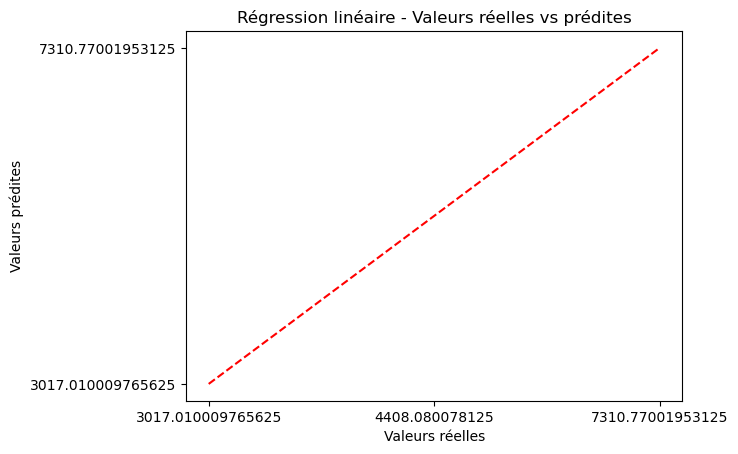

In [ ]:
import matplotlib.pyplot as plt

# Affichage des valeurs réelles vs prédites
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Régression linéaire - Valeurs réelles vs prédites')
plt.show()


Regression LASSO 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression Lasso avec un paramètre alpha (régularisation)
alpha = 0.1  # Vous pouvez ajuster ce paramètre pour contrôler la pénalisation
lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)

# Prédictions
y_pred = lasso.predict(X_test)

# Calcul des métriques
r2 = r2_score(y_test, y_pred)  # R² classique
n = X_test.shape[0]           # Nombre d'observations
p = X_test.shape[1]           # Nombre de variables explicatives

# Calcul du R² ajusté
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Affichage des résultats
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R²: {r2}")
print(f"R² ajusté: {r2_adjusted}")

# Affichage des coefficients Lasso
lasso_coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": lasso.coef_
})
print(lasso_coefficients[lasso_coefficients["Coefficient"] != 0])  # Variables sélectionnées


RMSE: 828.5363194223002
R²: 0.538548290695867
R² ajusté: 0.12324175232214718
           Variable  Coefficient
0      taux_chomage  -342.630494
1   indic_confiance    56.454247
2            ev_pib   366.621616
3   ev_importations    56.079271
4  ev_conso_menages   927.956666
5           ev_fbcf   -79.648790
6   ev_exportations    37.054644
7          ev_conso  -674.361896
8        ipc_menage    35.796226


/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.741e+06, tolerance: 1.254e+04
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
